In [103]:
from __future__ import print_function
import struct
import numpy as np
import math
import sys
import ROOT
import array
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse,Arrow
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import matplotlib 
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 30}
matplotlib.rc('font', **font)
import matplotlib.font_manager as font_manager


In [187]:

elements={"h": 1, "he": 2, "li": 3, "be": 4, "b": 5, "c": 6, "n": 7, "o": 8, "f": 9, "ne": 10, "na": 11, "mg": 12, "al": 13, 
"si": 14, "p": 15, "s": 16, "cl": 17, "ar": 18, "k": 19, "ca": 20, "sc": 21, "ti": 22, "v": 23, "cr": 24, "mn": 25, "fe": 26,
 "co": 27, "ni": 28, "cu": 29, "zn": 30, "ga": 31, "ge": 32, "as": 33, "se": 34, "br": 35, "kr": 36, "rb": 37, "sr": 38, "y": 39,
  "zr": 40, "nb": 41, "mo": 42, "tc": 43, "ru": 44, "rh": 45, "pd": 46, "ag": 47, "cd": 48, "in": 49, "sn": 50, "sb": 51, "te": 52,
   "i": 53, "xe": 54, "cs": 55, "ba": 56, "la": 57, "ce": 58, "pr": 59, "nd": 60, "pm": 61, "sm": 62, "eu": 63, "gd": 64, "tb": 65,
    "dy": 66, "ho": 67, "er": 68, "tm": 69, "yb": 70, "lu": 71, "hf": 72, "ta": 73, "w": 74, "re": 75, "os": 76, "ir": 77, "pt": 78,
     "au": 79, "hg": 80, "tl": 81, "pb": 82, "bi": 83, "po": 84, "at": 85, "rn": 86, "fr": 87, "ra": 88, "ac": 89, "th": 90, "pa": 91,
      "u": 92, "np": 93, "pu": 94, "am": 95, "cm": 96, "bk": 97, "cf": 98, "es": 99, "fm": 100, "md": 101, "no": 102, "lr": 103, "rf": 104,
       "db": 105, "sg": 106, "bh": 107, "hs": 108, "mt": 109, "ds": 110, "rg": 111, "cn": 112, "nh": 113, "fl": 114, "mc": 115, "lv": 116, "ts": 117, "og": 118,
	   "119": 119,"120": 120,"121": 121,"122": 122,"123": 123,"124": 124,"125": 125,"126": 126,"127": 127,"128": 128,"129": 129,"130": 130,
	   "131": 131,"132": 132,"133": 133,"134": 134,"135": 135,"136": 136}

Zele = []
Zele.append("n")
for key in elements:
	Zele.append(key)

def getnamebyz(z):
	"""
	Get element name by atomic number Z
	
	Parameters:
	   z ( int ): Atomic number Z
	"""
	return Zele[z]

def getZ(input):
	"""
	Get atomic number Z by element name
	
	Parameters:
	   input ( str ): Element name
	"""
	if (input==""):
		return -8888
	else:
		sep=re.split('(\d+)',input)
		if len(sep)==1:
			if sep[0]=="n":
				return int(0)
			elif (sep[0]=="p" or sep[0]=="d" or sep[0]=="t"):
				return int(1)			
			else:
				print("Something wrong! ",input)
		else:
			return int(elements[sep[0]])

def getA(input):
	"""
	Get mass number A by element name
	
	Parameters:
	   input ( str ): Element name
	"""
	if (input==""):
		return -9999
	else:
		sep=re.split('(\d+)',input)
		if len(sep)==1:
			if sep[0]=="n":
				return 1
			elif sep[0]=="p":
				return 1
			elif sep[0]=="d":
				return 2
			elif sep[0]=="t":
				return 3
			else:
				print("Something wrong! ",input)
		else:
			return int(sep[1])

def drawbox(N,Z,fcolor='None',ecolor='gray', falpha = 1,zorder=-1):
    if (zorder>0):
        rec = plt.Rectangle((N-0.5,Z-0.5),1,1,facecolor=fcolor,edgecolor=ecolor,alpha = falpha,zorder=zorder)
    else:
        rec = plt.Rectangle((N-0.5,Z-0.5),1,1,facecolor=fcolor,edgecolor=ecolor,alpha = falpha)
    #plt.text(N-0.4,Z-0.1,'$\mathregular{^{'+str(Z+N)+'}'+elements[Z]+'}$')
    return rec 


def drawarea(Aele,fcolor='None',iswithtext=True):
	recs = []
	for i in Aele:
		for j in range(i[1]-elements[i[0].lower()],i[2]-elements[i[0].lower()]+1):
			recs.append(drawbox(j,elements[i[0].lower()],fcolor))
	return recs


In [231]:
import re
Zlim = [9.5,116]
Nlim = [9.5,200]
def plot_base(axis,eletag=True):
	magic_num = [2, 8, 20, 28, 50, 82, 126]
	for i in magic_num:
		axis.axhline(y=i+0.5,color='b',linestyle='--',linewidth=0.2)
		axis.axhline(y=i-0.5,color='b',linestyle='--',linewidth=0.2)
		axis.axvline(x=i+0.5,color='b',linestyle='--',linewidth=0.2)
		axis.axvline(x=i-0.5,color='b',linestyle='--',linewidth=0.2)

	nubase_stable = np.load("nubase/nubase_stable.npy",allow_pickle='TRUE')
	for i in range(len(nubase_stable)):
		axis.add_patch(drawbox(nubase_stable[i]["N"],nubase_stable[i]["Z"],fcolor='k',ecolor='None',falpha = 1))
	axis.set_xlabel('Neutron number, $N$')
	axis.set_ylabel('Proton number, $Z$')
	axis.set_xlim(Nlim)
	axis.set_ylim(Zlim)
	if(eletag):    
		for i in range(int(Zlim[0]+0.5),int(Zlim[1]+0.5)):
			text = axis.text(Nlim[1]-1.5, i, getnamebyz(i).capitalize(),ha="center", va="center", color="k",fontweight='bold',fontsize='medium',family = ['Times New Roman'])
	axis.set_xticks(np.arange(Nlim[0]+0.5,Nlim[1]-0.5,2))
	axis.set_xticklabels([('%.0f'%i) for i in np.arange(Nlim[0]+0.5,Nlim[1]-0.5,2)])
	axis.set_yticks(np.arange(Zlim[0]+0.5,Zlim[1]-0.5,2))
	axis.set_yticklabels([('%.0f'%i) for i in np.arange(Zlim[0]+0.5,Zlim[1]-0.5,2)])    
def plot_magic(axis,color='y',linewidth=1):
	magic_num = [2, 8, 20, 28, 50, 82, 126]
	for i in magic_num:
		axis.axhline(y=i+0.5,color=color,linestyle='--',linewidth=linewidth)
		axis.axhline(y=i-0.5,color=color,linestyle='--',linewidth=linewidth)
		axis.axvline(x=i+0.5,color=color,linestyle='--',linewidth=linewidth)
		axis.axvline(x=i-0.5,color=color,linestyle='--',linewidth=linewidth)
#     axis.text(riname, i, getnamebyz(i).capitalize(),ha="center", va="center", color="k",fontweight='normal',fontsize='medium',family = ['Times New Roman'])

In [229]:
nubase_bminus = np.load("nubase/nubase_bminus.npy",allow_pickle='TRUE')
ame = np.load("ame/all_ame20.npy",allow_pickle='TRUE')
hfb32 = np.load("models/data_hfb32.npy",allow_pickle='TRUE')
ktuy05 = np.load("models/data_ktuy05.npy",allow_pickle='TRUE')
rchb18 = np.load("models/data_rchb18.npy",allow_pickle='TRUE')
ws4rbf = np.load("models/data_WS4RBF.npy",allow_pickle='TRUE')
dz10 = np.load("models/data_dz10.npy",allow_pickle='TRUE')
frdm12 = np.load("models/data_frdm12.npy",allow_pickle='TRUE')

theo = []
theo.append({"name":"FRDM2012","data":frdm12})
theo.append({"name":"HFB-32 (2016)","data":hfb32})
theo.append({"name":"KTUY2005","data":ktuy05})
theo.append({"name":"RCHB+PCPK1 (2018)","data":rchb18})
theo.append({"name":"WS4+RBF (2015)","data":ws4rbf})
theo.append({"name":"DZ10 (2017)","data":dz10})

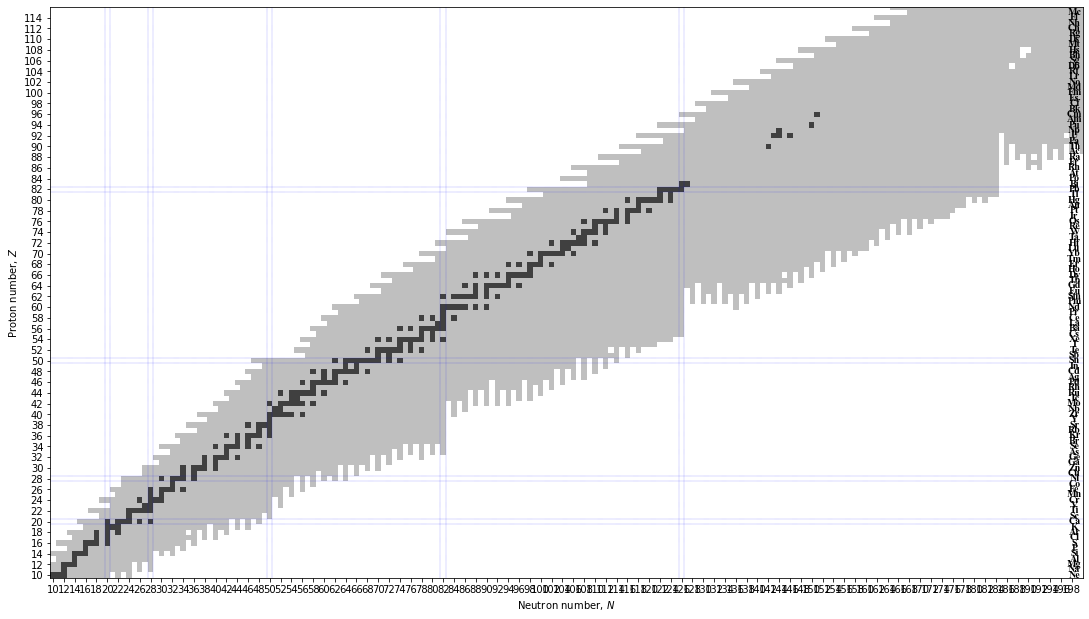

In [5]:
fig,axis = plt.subplots()
fig.set_size_inches(18.5,10.5)
fig.subplots_adjust(hspace=0,wspace=0)
plot_base(axis)
for i in range(len(frdm12)):
    if (frdm12[i]["isbound"]):
        plt.gca().add_patch(drawbox(frdm12[i]["N"],frdm12[i]["Z"],fcolor='gray',ecolor='None',falpha = 0.5))


### Plot systematic for certain nuclei

In [327]:
def plotsys(Z,Nrange):
    #ame
    ame_exp = []
    ame_exp_err = []
    NN_ame_exp = []
    ame_extr = []
    ame_extr_err = []
    NN_ame_extr = []
    for idx,i in enumerate(theo[0]["data"]):
        if (i["Z"]==Z and i["N"]<=Nrange[1] and i["N"]>=Nrange[0]):
            entry = next((item for item in ame if (item["Z"] == i["Z"] and item["N"] == i["N"])), None)
            if (entry!=None):
                #AME exp
                if (entry["is_ex_M"]==1):
                    ame_exp.append(entry["M"]/1000.-i["mass"])
#                     print(i["N"],i["mass"],entry["M"]/1000.)
                    ame_exp_err.append(entry["DM"]/1000.)
                    NN_ame_exp.append(i["N"])
                #AME extr
                else:
                    ame_extr.append(entry["M"]/1000.-i["mass"])
                    ame_extr_err.append(entry["DM"]/1000.)
                    NN_ame_extr.append(i["N"])
#     print(NN_ame_exp,ame_exp,ame_exp_err)
#     print(NN_ame_extr,ame_extr,ame_extr_err)
    dataset = []
    NN = []
    for idx,i in enumerate(theo[0]["data"]):
        if (i["Z"]==Z and i["N"]<=Nrange[1] and i["N"]>=Nrange[0]):
            datum = []
            #FRDM
            datum.append(0.)
            #Others
            for j in range(1,len(theo)):
                entry = next((item for item in theo[j]["data"] if (item["Z"] == i["Z"] and item["N"] == i["N"])), None)
                datum.append(entry["mass"]-i["mass"])
            dataset.append(datum)
            NN.append(i["N"])
    dataset = np.asarray(dataset)
    dataset = dataset.transpose()
#     print(dataset)
    fig,axis = plt.subplots()
    fig.set_size_inches(18.5,10.5)
    fig.subplots_adjust(hspace=0,wspace=0)
    for j in range(len(theo)):
        if (j==0):
            axis.plot(NN,dataset[j],'--',color='grey',label=theo[j]['name'])
        else:
            axis.plot(NN,dataset[j],label=theo[j]['name'])
    axis.errorbar(NN_ame_exp,ame_exp,yerr=ame_exp_err,fmt='o',markerfacecolor='k',markeredgecolor='k',markersize=12,color='k',label='AME2020 exp.')
    axis.errorbar(NN_ame_extr,ame_extr,yerr=ame_extr_err,fmt='o',markerfacecolor='None',markeredgecolor='k',markersize=12,color='k',label='AME2020 extr.')
    legfont = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=20)
    axis.legend(ncol=3,loc = 'lower left',prop=legfont)
    
    axis.set_xlabel("Neutron number N")
    axis.set_ylabel(r"$M_{i}-M_{FRDM2012}$ (MeV)")
    return axis


In [318]:
def plotsysS2n(axis,Z,Nrange,offset = 0.,drawleg = True):
    #ame
    ame_exp = []
    ame_exp_err = []
    NN_ame_exp = []
    ame_extr = []
    ame_extr_err = []
    NN_ame_extr = []
    for idx,i in enumerate(theo[0]["data"]):
        if (i["Z"]==Z and i["N"]<=Nrange[1] and i["N"]>=Nrange[0]):
            entry = next((item for item in ame if (item["Z"] == i["Z"] and item["N"] == i["N"])), None)
            if (entry!=None):
                #AME exp
                if (entry["is_ex_M"]==1):
                    ame_exp.append(entry["S2n"]/1000)
#                     print(i["N"],i["mass"],entry["M"]/1000.)
                    ame_exp_err.append(entry["D_S2n"]/1000.)
                    NN_ame_exp.append(i["N"])
                #AME extr
                else:
                    ame_extr.append(entry["S2n"]/1000.)
                    ame_extr_err.append(entry["D_S2n"]/1000.)
                    NN_ame_extr.append(i["N"])
#     print(NN_ame_exp,ame_exp,ame_exp_err)
#     print(NN_ame_extr,ame_extr,ame_extr_err)
    dataset = []
    NN = []
    for idx,i in enumerate(theo[0]["data"]):
        if (i["Z"]==Z and i["N"]<=Nrange[1] and i["N"]>=Nrange[0]):
            datum = []
            for j in range(len(theo)):
                entry = next((item for item in theo[j]["data"] if (item["Z"] == i["Z"] and item["N"] == i["N"])), None)
                datum.append(entry["S2n"])
            dataset.append(datum)
            NN.append(i["N"])
    dataset = np.asarray(dataset)
    dataset = dataset.transpose()
#     print(dataset)
    for j in range(len(theo)):
        axis.plot(NN,[k+offset for k in dataset[j]],label=theo[j]['name'])
    axis.errorbar(NN_ame_exp,[k+offset for k in ame_exp],yerr=ame_exp_err,fmt='o',markerfacecolor='k',markeredgecolor='k',markersize=12,color='k',label='AME2020 exp.')
    axis.errorbar(NN_ame_extr,[k+offset for k in ame_extr],yerr=ame_extr_err,fmt='o',markerfacecolor='None',markeredgecolor='k',markersize=12,color='k',label='AME2020 extr.')
    
    axis.text(NN_ame_exp[0], ame_exp[0]+offset-1.5,str(NN_ame_exp[0]+Z),ha="center", va="center", color="b",fontweight='bold',fontsize=30,family = ['Times New Roman'])

    legfont = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=20)
    if (drawleg):
        axis.legend(ncol=2,loc = 'upper right',bbox_to_anchor=(1.07, 1.),prop=legfont)
    
    axis.set_xlabel("Neutron number N")
    axis.set_ylabel(r"$S_{2n}$ (MeV)")
    return axis


In [335]:
def printmass(Z,Nrange):
    for j in range(len(theo)):
        for idx,i in enumerate(theo[j]["data"]):
            if (i["Z"]==Z and i["N"]<=Nrange[1] and i["N"]>=Nrange[0]):
                if (j==0):
                    entry = next((item for item in ame if (item["Z"] == i["Z"] and item["N"] == i["N"])), None)
                    if (entry!=None):
                        #AME exp
                        if (entry["is_ex_M"]==1):
                            print(str(i["Z"]+i["N"])+getnamebyz(i["Z"]).capitalize(),"AME exp Mass=",entry["M"]/1000.," +/- ",entry["DM"]/1000.,"MeV")
                        #AME extr
                        else:
                            print(str(i["Z"]+i["N"])+getnamebyz(i["Z"]).capitalize(),"AME extr Mass=",entry["M"]/1000.," +/- ",entry["DM"]/1000.,"MeV")
                print(str(i["Z"]+i["N"])+getnamebyz(i["Z"]).capitalize(),theo[j]['name']," Mass= ",i["mass"],"MeV")


In [338]:
printmass(50,[84,86])

134Sn AME exp Mass= -66.43375900000001  +/-  0.0031669999999999997 MeV
134Sn FRDM2012  Mass=  -66.65 MeV
135Sn AME exp Mass= -60.632252  +/-  0.003074 MeV
135Sn FRDM2012  Mass=  -60.4 MeV
136Sn AME extr Mass= -56.17  +/-  0.2 MeV
136Sn FRDM2012  Mass=  -56.13 MeV
134Sn HFB-32 (2016)  Mass=  -66.72 MeV
135Sn HFB-32 (2016)  Mass=  -61.19 MeV
136Sn HFB-32 (2016)  Mass=  -57.17 MeV
134Sn KTUY2005  Mass=  -66.68 MeV
135Sn KTUY2005  Mass=  -60.73 MeV
136Sn KTUY2005  Mass=  -56.7 MeV
134Sn RCHB+PCPK1 (2018)  Mass=  -67.18072975999985 MeV
135Sn RCHB+PCPK1 (2018)  Mass=  -60.75941169999987 MeV
136Sn RCHB+PCPK1 (2018)  Mass=  -55.99809363999998 MeV
134Sn WS4+RBF (2015)  Mass=  -66.5727297599999 MeV
135Sn WS4+RBF (2015)  Mass=  -60.55471169999987 MeV
136Sn WS4+RBF (2015)  Mass=  -56.35569364000003 MeV
134Sn DZ10 (2017)  Mass=  -66.19872975999988 MeV
135Sn DZ10 (2017)  Mass=  -60.22741169999995 MeV
136Sn DZ10 (2017)  Mass=  -55.80309364000004 MeV


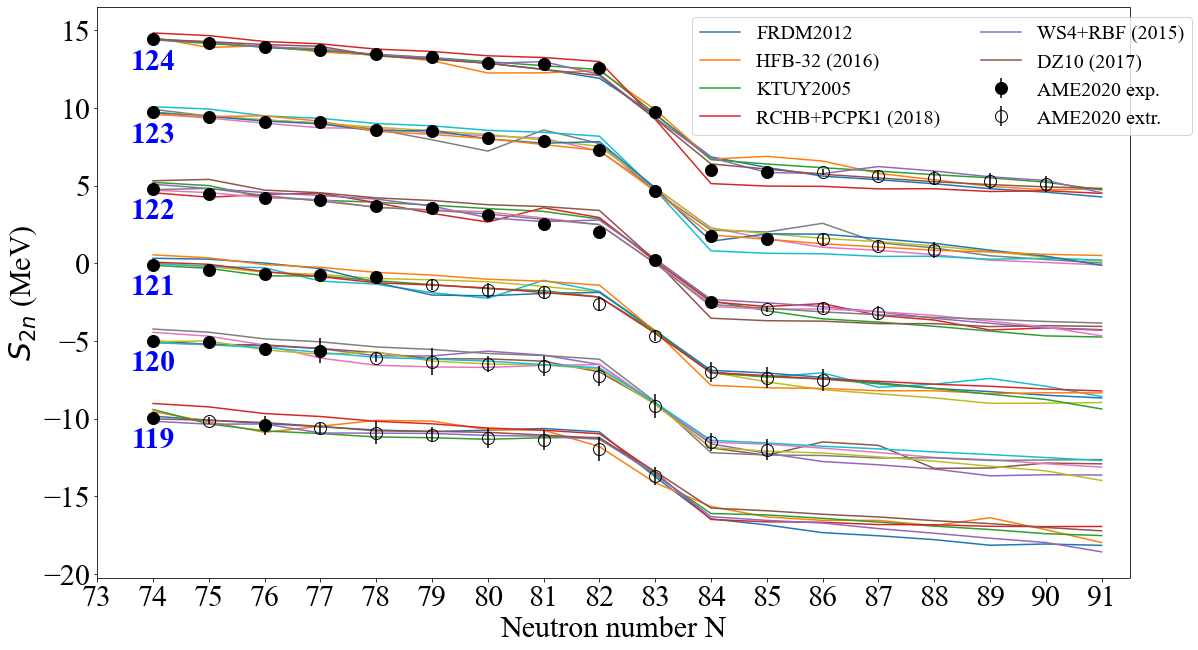

In [319]:
fig,axis = plt.subplots()
fig.set_size_inches(18.5,10.5)
fig.subplots_adjust(hspace=0,wspace=0)
axis = plotsysS2n(axis,50,[74,91],0,True)
axis = plotsysS2n(axis,49,[74,91],-4.,False)
axis = plotsysS2n(axis,48,[74,91],-8.,False)
axis = plotsysS2n(axis,47,[74,91],-12.,False)
axis = plotsysS2n(axis,46,[74,91],-16.,False)
axis = plotsysS2n(axis,45,[74,91],-20.,False)
axis.set_xlim([73.5,91.5])
axis.set_xticks(np.arange(73,92,1));
axis.set_xticklabels(np.arange(73,92,1));    


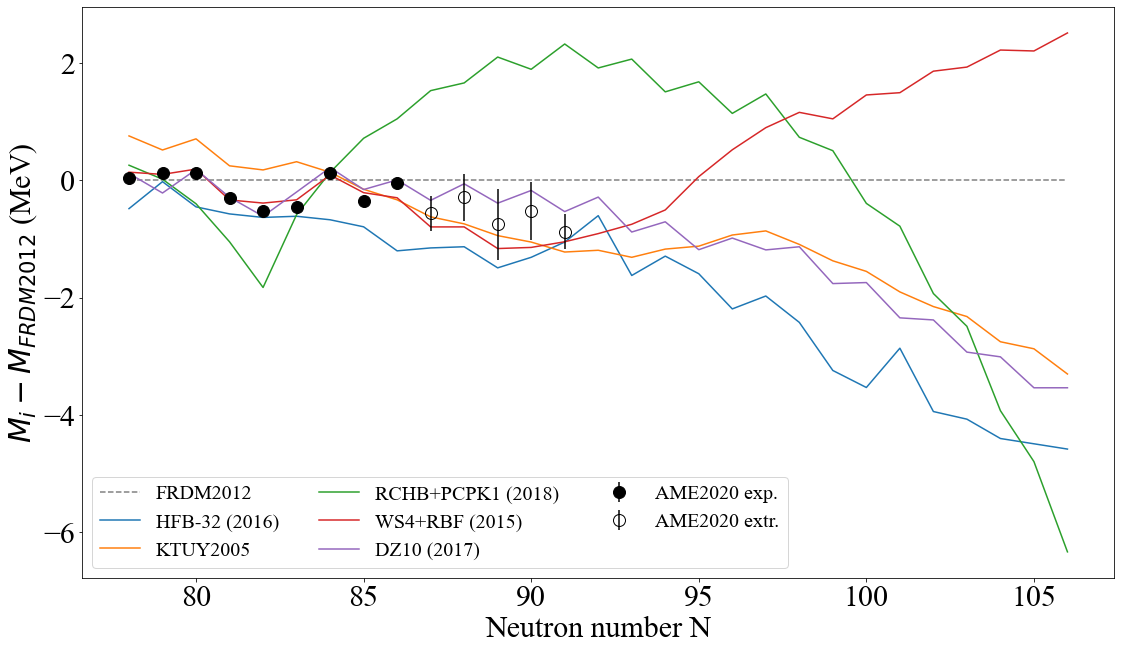

In [268]:
axis = plotsys(51,[78,106])

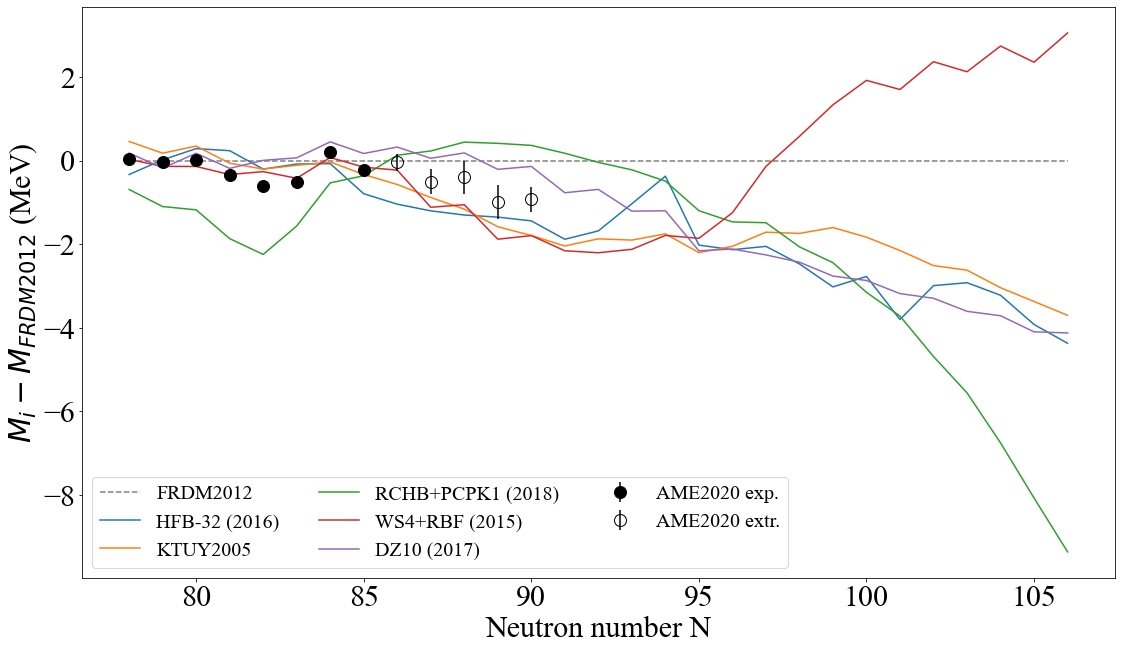

In [156]:
axis = plotsys(50,[78,106])

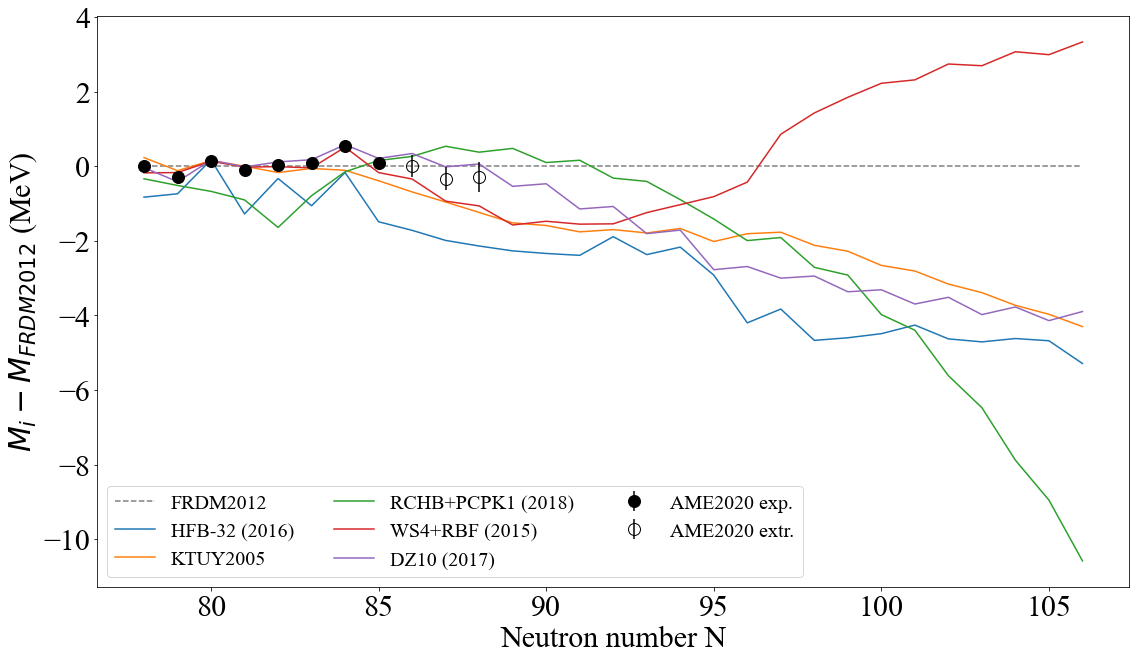

In [157]:
axis = plotsys(49,[78,106])

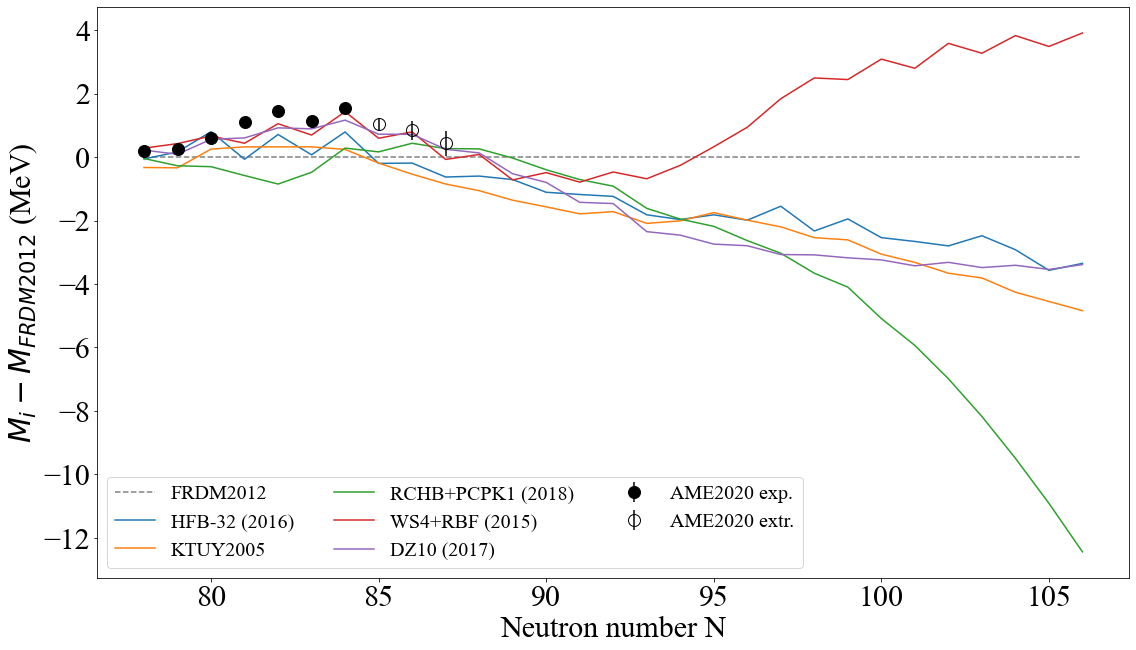

In [158]:
axis = plotsys(48,[78,106])

In [227]:
def plot_tag(axis,riname):
    temp = re.findall(r'\d+', riname)
    res = list(map(int, temp))[0]
    ele = ""
    if (riname[0].isdigit()):
        ele = riname[len(str(res)):]
    else:
        ele = riname[:len(riname)-len(str(res))]
    text = axis.text(res-elements[ele.lower()], elements[ele.lower()]+0.1, r'$\mathrm{^{'+str(res)+"}}$"+ele.capitalize(),ha="center", va="center", color="k",fontweight='bold',fontsize=17,family = ['Times New Roman'])

def plot_tag_NZ(axis,N,Z):
    ele = getnamebyz(Z)
    res = N+Z
    text = axis.text(res-elements[ele.lower()], elements[ele.lower()]+0.1, r'$\mathrm{^{'+str(res)+"}}$"+ele.capitalize(),ha="center", va="center", color="k",fontweight='bold',fontsize=17,family = ['Times New Roman'])


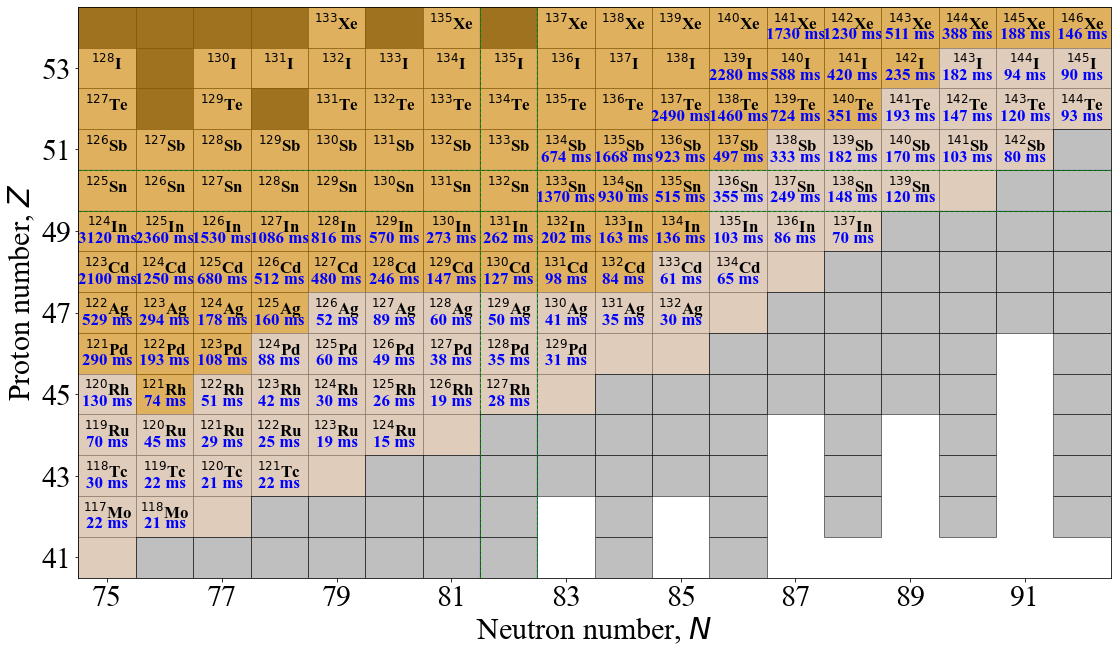

In [340]:
Zlim = [40.5,54.5]
Nlim = [74.5,92.5]
fig,axis = plt.subplots()
fig.set_size_inches(18.5,10.5)
fig.subplots_adjust(hspace=0,wspace=0)
plot_base(axis,False)
for i in range(len(frdm12)):
    if (frdm12[i]["isbound"]):
        plt.gca().add_patch(drawbox(frdm12[i]["N"],frdm12[i]["Z"],fcolor='gray',ecolor='k',falpha = 0.5))

for i in range(len(ame)):
    if (ame[i]["Z"]>Zlim[0] and ame[i]["Z"]<Zlim[1] and ame[i]["N"]>Nlim[0] and ame[i]["N"]<Nlim[1]):
        if (ame[i]["is_ex_M"]):
            plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='orange',ecolor='None', falpha = 0.5))
        else:
            plt.gca().add_patch(drawbox(ame[i]["N"],ame[i]["Z"],fcolor='peachpuff',ecolor='None', falpha = 0.5))
plot_magic(axis,'g')

# plot_tag(axis,"In134")
# plot_tag_NZ(axis,82,50)

for i in range(len(nubase_bminus)):
    if (nubase_bminus[i]["Z"]>Zlim[0] and nubase_bminus[i]["Z"]<Zlim[1] and nubase_bminus[i]["N"]>Nlim[0] and nubase_bminus[i]["N"]<Nlim[1]):
        plot_tag_NZ(axis,nubase_bminus[i]["N"],nubase_bminus[i]["Z"])
        if (nubase_bminus[i]["T12"]<5):
            axis.text(nubase_bminus[i]["N"], nubase_bminus[i]["Z"]-0.2, "%.0f ms" % round(nubase_bminus[i]["T12"]*1000,0),ha="center", va="center", color="b",fontweight='bold',fontsize=17,family = ['Times New Roman'])

